In [28]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from scipy import stats

# Census API Key
from config import api_key
from us_state_abbrev import us_state_abbrev
c = Census(api_key, year=2018)

In [29]:
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E"), {'for': 'county:*'})
# CHECK FOR YEAR

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "NAME": "Name", "county": "County"})




In [30]:
census = census_pd[["County", "Name", "Population", "Median Age", "Household Income", ]].copy()
census

,County,Name,Population,Median Age,Household Income
0,173,"Sedgwick County, Kansas",512064.0,35.2,54974.0
1,157,"Republic County, Kansas",4686.0,51.1,48022.0
2,065,"Graham County, Kansas",2545.0,51.9,40769.0
3,045,"Douglas County, Kansas",119319.0,29.5,55832.0
4,179,"Sheridan County, Kansas",2506.0,44.3,56071.0
...,...,...,...,...,...
3215,003,"Adams County, Idaho",4019.0,54.2,45319.0
3216,053,"Jerome County, Idaho",23431.0,32.7,49306.0
3217,061,"Lewis County, Idaho",3845.0,48.3,41326.0
3218,073,"Owyhee County, Idaho",11455.0,38.4,40430.0


In [31]:
# Final DataFrame
census = census_pd[["County", "Name", "Population", "Median Age", "Household Income"]].copy()
census.to_csv("resources/census_data.csv", encoding="utf-8", index=False)
census['county'] = census['Name'].str.replace(' County', '').str.replace(' Parish', '')
census.drop(['County', 'Name'], axis=1, inplace=True)
census.head()


,Population,Median Age,Household Income,county
0,512064.0,35.2,54974.0,"Sedgwick, Kansas"
1,4686.0,51.1,48022.0,"Republic, Kansas"
2,2545.0,51.9,40769.0,"Graham, Kansas"
3,119319.0,29.5,55832.0,"Douglas, Kansas"
4,2506.0,44.3,56071.0,"Sheridan, Kansas"


In [32]:
covid = pd.read_csv('resources/covid-statistics.csv')
covid['county'] = covid['county'] + ', ' + covid['state']
covid.drop('state', axis=1, inplace=True)
covid

,date,county,fips,cases,deaths
0,2020-01-21,"Snohomish, Washington",53061.0,1,0.0
1,2020-01-22,"Snohomish, Washington",53061.0,1,0.0
2,2020-01-23,"Snohomish, Washington",53061.0,1,0.0
3,2020-01-24,"Cook, Illinois",17031.0,1,0.0
4,2020-01-24,"Snohomish, Washington",53061.0,1,0.0
...,...,...,...,...,...
2161172,2022-01-28,"Sweetwater, Wyoming",56037.0,10133,115.0
2161173,2022-01-28,"Teton, Wyoming",56039.0,9272,15.0
2161174,2022-01-28,"Uinta, Wyoming",56041.0,5273,34.0
2161175,2022-01-28,"Washakie, Wyoming",56043.0,2150,41.0


In [33]:
covid_total = covid.groupby('county').max()
covid_total.sort_values('county')

,date,fips,cases,deaths
county,,,,
"Abbeville, South Carolina",2022-01-28,45001.0,6104,57.0
"Acadia, Louisiana",2022-01-28,22001.0,14951,269.0
"Accomack, Virginia",2022-01-28,51001.0,6569,90.0
"Ada, Idaho",2022-01-28,16001.0,103141,915.0
"Adair, Iowa",2022-01-28,19001.0,1488,46.0
...,...,...,...,...
"Yuma, Arizona",2022-01-28,4027.0,57792,1046.0
"Yuma, Colorado",2022-01-28,8125.0,1703,22.0
"Zapata, Texas",2022-01-28,48505.0,2889,47.0


In [34]:
def makehealthcsv(x, colname):
        x = x[x["LocationAbbr"].isin(us_state_abbrev)]
        x = x[(x['Stratification1'] == 'Overall') &  (x['Stratification2'] == 'Overall')]
        x['county'] = x['LocationDesc'] + ', ' + x['LocationAbbr'].apply(lambda x: us_state_abbrev[x]) 
        x = x[['county','Data_Value']].dropna()
        x['county'] = x['county'].str.replace(' County', '').str.replace(' Parish', '')
        x.rename(columns = {'Data_Value' : colname}, inplace = True)
        x.drop_duplicates('county')
        return x

In [35]:
heart_disease = makehealthcsv(pd.read_csv("resources/Heart-Disease-by-County.csv"), 'Heart Disease')
heart_disease

,county,Heart Disease
0,"Aleutians East, Alaska",155.2
1,"Aleutians West, Alaska",174.2
2,"Anchorage, Alaska",249.3
3,"Bethel, Alaska",349.8
5,"Denali, Alaska",319.2
...,...,...
58681,"Teton, Wyoming",170.5
58682,"Uinta, Wyoming",353.4
58683,"Washakie, Wyoming",314.5
58684,"Weston, Wyoming",290.6


In [36]:
stroke = makehealthcsv(pd.read_csv("resources/Stroke-by-County.csv"), 'Stroke')
stroke

,county,Stroke
0,"Aleutians East, Alaska",2.0
1,"Aleutians West, Alaska",0.0
2,"Anchorage, Alaska",63.7
3,"Bethel, Alaska",105.5
5,"Denali, Alaska",58.0
...,...,...
58681,"Teton, Wyoming",48.2
58682,"Uinta, Wyoming",52.8
58683,"Washakie, Wyoming",66.3
58684,"Weston, Wyoming",60.0


In [47]:
merged_df = pd.merge(covid_total, census, on='county')
merged_df = pd.merge(merged_df, heart_disease, on='county')
merged_df = pd.merge(merged_df, stroke, on='county')
merged_df.sort_values('county')
merged_df.dropna(inplace = True)
merged_df[['County','State']] = merged_df.county.str.split(", ",expand=True)
merged_df.drop(columns = ['fips', 'county', 'date'], inplace = True)
merged_df.rename(columns = {'cases' : 'Cases', 'deaths' : 'Deaths'}, inplace=True)
merged_df['Cases per Capita'] = merged_df['Cases']/merged_df['Population']
merged_df['Deaths per Capita'] = merged_df['Deaths']/merged_df['Population']
merged_df.sort_values('Cases per Capita', ascending = False)
merged_df.drop(merged_df.loc[merged_df['Population'] < 20000].index, inplace = True)
merged_df.drop(merged_df.loc[merged_df['Population'] > 200000].index, inplace = True)
merged_df.to_csv('resources/data.csv')
merged_df

,Cases,Deaths,Population,Median Age,Household Income,Heart Disease,Stroke,County,State,Cases per Capita,Deaths per Capita
0,6104,57.0,24657.0,43.8,36685.0,321.0,78.6,Abbeville,South Carolina,0.247556,0.002312
1,14951,269.0,62568.0,36.2,41177.0,476.2,93.6,Acadia,Louisiana,0.238956,0.004299
2,6569,90.0,32742.0,45.9,43210.0,411.2,92.1,Accomack,Virginia,0.200629,0.002749
6,5535,56.0,25325.0,27.7,40046.0,335.1,80.7,Adair,Missouri,0.218559,0.002211
7,6678,65.0,22113.0,37.6,32986.0,575.0,62.7,Adair,Oklahoma,0.301994,0.002939
...,...,...,...,...,...,...,...,...,...,...,...
3065,7537,95.0,27974.0,35.7,31402.0,368.6,119.6,Yazoo,Mississippi,0.269429,0.003396
3066,6386,94.0,21573.0,39.3,42361.0,472.9,86.2,Yell,Arkansas,0.296018,0.004357
3068,38255,486.0,157816.0,38.2,59117.0,322.4,70.9,Yellowstone,Montana,0.242403,0.003080
3075,9037,88.0,67587.0,39.5,90367.0,233.0,72.0,York,Virginia,0.133709,0.001302


In [42]:
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Cases,Deaths,Population,Median Age,Household Income,Heart Disease,Stroke,Cases per Capita,Deaths per Capita
Cases,1.000000,0.820844,0.945549,-0.238668,0.269971,-0.156835,-0.070191,0.252368,-0.108635
Deaths,0.820844,1.000000,0.789538,-0.086999,0.024521,0.071611,0.082727,0.178026,0.317524
Population,0.945549,0.789538,1.000000,-0.170200,0.333331,-0.212833,-0.113795,-0.011521,-0.209909
Median Age,-0.238668,-0.086999,-0.170200,1.000000,-0.026852,-0.074549,-0.102467,-0.295382,0.075238
Household Income,0.269971,0.024521,0.333331,-0.026852,1.000000,-0.530611,-0.437843,-0.145055,-0.522027
Heart Disease,-0.156835,0.071611,-0.212833,-0.074549,-0.530611,1.000000,0.518849,0.198579,0.540198
Stroke,-0.070191,0.082727,-0.113795,-0.102467,-0.437843,0.518849,1.000000,0.143251,0.399246
Cases per Capita,0.252368,0.178026,-0.011521,-0.295382,-0.145055,0.198579,0.143251,1.000000,0.344670
Deaths per Capita,-0.108635,0.317524,-0.209909,0.075238,-0.522027,0.540198,0.399246,0.344670,1.000000


In [43]:
#Takes axis and col names, r=True puts r-value in legend, by default it doesn't, xunit/yunit add unit to labels
def makescatter(ax, col1, col2, r=False, xunit='', yunit=''):
    xs = merged_df[col1]
    ys = merged_df[col2]
    (m, b, rvalue, p, q) = stats.linregress(xs, ys)
    regress = [m*x + b for x in xs]
    ax.scatter(xs, ys)
    ax.plot(xs, regress, 'r-', label=round(rvalue**2, 3))
    if xunit:
        col1 += f' ({xunit})'
    if yunit:
        col2 += f' ({yunit})'
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(col1 + ' vs ' + col2)
    if r:
        ax.legend()
    return

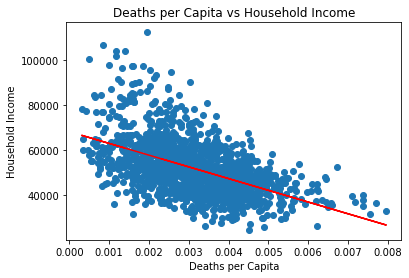

In [44]:
#plotting 1 plot, no extra stuff
fig, ax1 = plt.subplots(1,1)

makescatter(ax1, 'Deaths per Capita', 'Household Income')


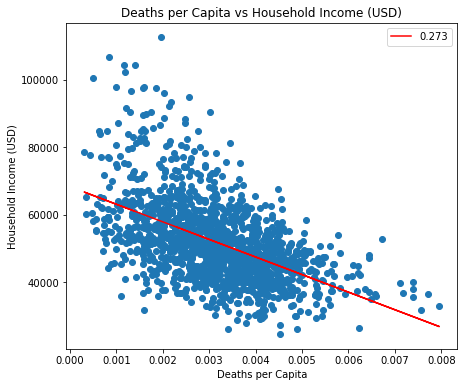

In [45]:
#plotting 1 plot, with rvalue and yunit and figsize corrected
fig, ax1 = plt.subplots(1,1, figsize=(7,6))

makescatter(ax1, 'Deaths per Capita', 'Household Income', r=True, yunit='USD')


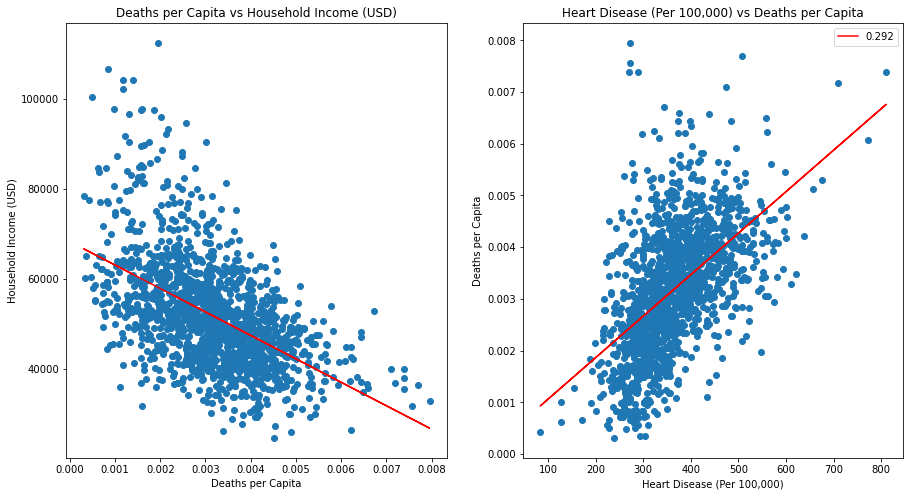

In [46]:
#plotting 2 plots

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

makescatter(ax1, 'Deaths per Capita', 'Household Income', yunit='USD')

makescatter(ax2, 'Heart Disease', 'Deaths per Capita', xunit='Per 100,000', r=True)
